In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import uncertainties
from uncertainties import unumpy
import os

In [6]:
os.listdir(")

['calib_df.csv',
 'freq_calib_eletrodo.npy',
 'ref_power_eletrodo.npy',
 'drive_power-eletrodo.npy']

In [7]:
calib_df = pd.read_csv("../../data/1550/calib/calib_df.csv")
calib_df.head()

,voltage_xx,mean_force_xx,std_force_xx,calib_curve_xx,voltage_xy,mean_force_xy,std_force_xy,calib_curve_xy,voltage_yx,mean_force_yx,std_force_yx,calib_curve_yx,voltage_yy,mean_force_yy,std_force_yy,calib_curve_yy
0,1.0,2.551766e-16,1.613650e-17,2.555037e-16,1.0,3.042820e-16,1.923926e-17,3.140964e-16,1.0,2.983727e-16,1.886807e-17,3.051522e-16,1.0,2.342198e-16,1.480935e-17,2.369911e-16
1,2.0,5.390189e-16,3.408572e-17,5.387201e-16,2.0,5.858475e-16,3.704220e-17,5.347183e-16,2.0,5.490922e-16,3.472272e-17,5.229903e-16,2.0,4.888903e-16,3.091176e-17,4.729197e-16
2,3.0,8.288402e-16,5.241303e-17,8.219365e-16,3.0,7.563946e-16,4.782562e-17,7.553403e-16,3.0,7.576696e-16,4.791244e-17,7.408283e-16,3.0,7.192292e-16,4.547572e-17,7.088484e-16
3,4.0,1.101405e-15,6.964908e-17,1.105153e-15,4.0,9.518702e-16,6.018524e-17,9.759622e-16,4.0,9.463188e-16,5.984197e-17,9.586664e-16,4.0,9.126869e-16,5.770774e-17,9.447770e-16
4,5.0,1.382702e-15,8.743733e-17,1.388369e-15,5.0,1.171574e-15,7.407675e-17,1.196584e-15,5.0,1.142599e-15,7.225406e-17,1.176504e-15,5.0,1.183724e-15,7.484499e-17,1.180706e-15


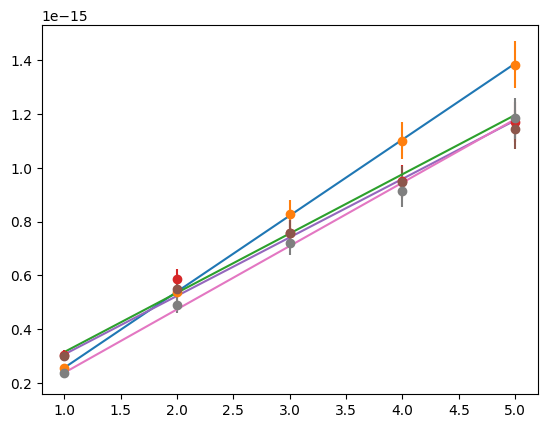

In [13]:
plt.plot(calib_df['voltage_xx'].values, calib_df['calib_curve_xx'].values)
plt.errorbar(calib_df['voltage_xx'].values, calib_df['mean_force_xx'].values, yerr=calib_df['std_force_xx'].values, fmt='o')
plt.plot(calib_df['voltage_xy'].values, calib_df['calib_curve_xy'].values)
plt.errorbar(calib_df['voltage_xy'].values, calib_df['mean_force_xy'].values, yerr=calib_df['std_force_xy'].values, fmt='o')
plt.plot(calib_df['voltage_yx'].values, calib_df['calib_curve_yx'].values)
plt.errorbar(calib_df['voltage_yx'].values, calib_df['mean_force_yx'].values, yerr=calib_df['std_force_yx'].values, fmt='o')
plt.plot(calib_df['voltage_yy'].values, calib_df['calib_curve_yy'].values)
plt.errorbar(calib_df['voltage_yy'].values, calib_df['mean_force_yy'].values, yerr=calib_df['std_force_yy'].values, fmt='o')
plt.show()

In [ ]:
plt.plot(calib_df['voltage_yy'].values, calib_df['calib_curve_yy'].values)
plt.errorbar(calib_df['voltage_yy'].values, calib_df['mean_force_yy'].values, yerr=calib_df['std_force_yy'].values, fmt='o')


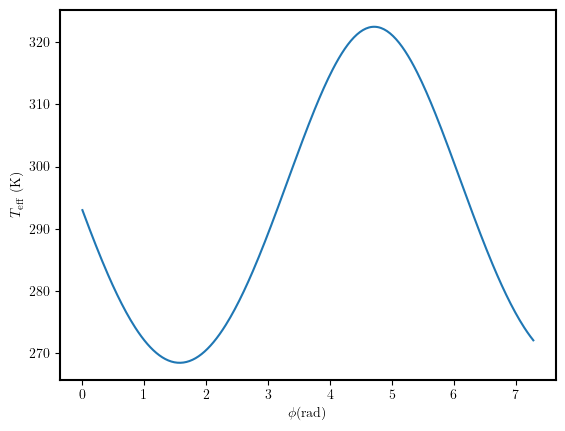

In [222]:
def theoretical_delay(delay, G, m, gamma, omega, T=293):
    g = G/(gamma*omega)
    k = (omega**2)*m
    Q_0 = omega/gamma
    first_term = T/(1+g*np.sin(delay))
    second_term = g/(2*Q_0)
    second_term = second_term*((np.sin(delay)*(delay-g*np.cos(delay)))+g*delay)
    second_term = second_term*(1/np.power(1+g*np.sin(delay),2))
    return first_term + second_term

phi = np.linspace(0, 2*np.pi+1, 300)
m = 2200*4*np.pi*np.power(uncertainties.ufloat(143e-9,3e-9)/2,3)/3
gamma = uncertainties.ufloat(5.5e3,0.02*5.5e3)
omega = 2*np.pi*94e3
G = 1e-9/m
plt.plot(phi, unumpy.nominal_values(theoretical_delay(phi, G, m, gamma, omega)))
plt.xlabel(r'$\phi$(rad)')
plt.ylabel(r'$T_{\rm{eff}}$ (K)')
plt.savefig("delay_theory.png", dpi=300)
plt.show()


In [62]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({
    "text.usetex": True,
})

In [63]:
delay_x = pd.read_csv("../../data/1550/delay/delay_x_50000.csv")
delay_y = pd.read_csv("../../data/1550/delay/delay_y_19440.csv")

In [64]:
delay_x.head()

,Unnamed: 0,delay,mean_temps_x,std_temps_x,mean_temps_y,std_temps_y,phase_x,phase_y
0,0,31,119.410133,21.379969,293.258556,62.501077,1.599247,1.714656
1,1,3,185.623357,33.235216,294.290186,65.881549,0.507078,0.543671
2,2,135,665.925106,119.231572,292.335195,59.475384,5.655872,6.064028
3,3,170,162.862687,29.159997,292.639603,60.472875,7.021083,7.527759
4,4,100,1021.545033,182.904082,291.513693,56.783462,4.290662,4.600297


In [65]:
delay_y.head()

,Unnamed: 0,delay,mean_temps_x,std_temps_x,mean_temps_y,std_temps_y,phase_x,phase_y
0,0,36,277.726487,56.637899,138.575228,27.598309,1.794277,1.923761
1,1,3,310.679103,67.379874,204.511684,40.730055,0.507078,0.543671
2,2,70,273.386016,55.222982,345.584628,68.825803,3.120481,3.345671
3,3,30,311.590342,67.676921,142.239184,28.328014,1.560241,1.672835
4,4,50,295.530719,62.441766,177.922373,35.434592,2.340361,2.509253


In [66]:
G

296872920.2174601

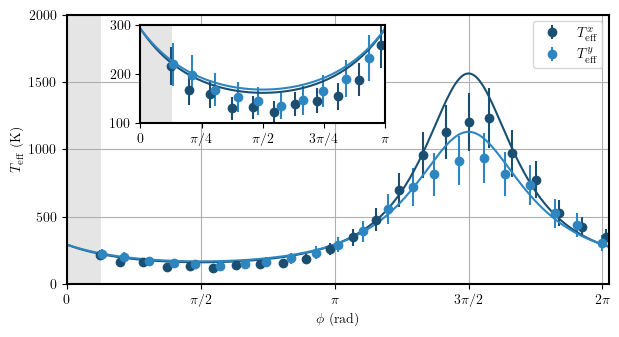

In [223]:
colors = ['#2E86C1', '#85C1E9', '#1B4F72']

fig, ax1 = plt.subplots(1, 1)
factor = 0.7
fig.set_size_inches(10*factor, 5*factor, forward=True)

theory_x = theoretical_delay(phi, 0.71*G_NV_x/m, m, gamma, 2*np.pi*97e3)
theory_y = theoretical_delay(phi, G_NV_y/m, m, gamma, 2*np.pi*104e3)

delay_x = delay_x.sort_values(by='phase_y')
ax1.errorbar(delay_x['phase_x'].values[::2], delay_x['mean_temps_x'].values[::2], yerr=delay_x['std_temps_x'].values[::2], fmt='o', color=colors[2], label=r'$T_{\rm{eff}}^x$')
ax1.plot(phi, unumpy.nominal_values(theory_x), color=colors[2], linestyle='solid', label=r'_$T_{\rm{eff}}^x$')# - unumpy.std_devs(theory_x), unumpy.nominal_values(theory_x) + unumpy.std_devs(theory_x), alpha=0.2)

delay_y = delay_y.sort_values(by='phase_y')
ax1.errorbar(delay_y['phase_y'].values[::2], delay_y['mean_temps_y'].values[::2], yerr=delay_y['std_temps_y'].values[::2], fmt='o', color=colors[0], label=r'$T_{\rm{eff}}^y$')
ax1.plot(phi, unumpy.nominal_values(theory_y), color=colors[0], label=r'_$T_{\rm{eff}}^x$')# - unumpy.std_devs(theory_y), unumpy.nominal_values(theory_y) + unumpy.std_devs(theory_y), alpha=0.2)


#ax1.plot(t[::10]/1e-3, traces_x[0,:][::10]/1e-6)

#ax1.set_xlim([0, t.max()/1e-3])
ax1.set_yticks([0, 500, 1000, 1500, 2000])
ax1.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax1.set_xticklabels([r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])
#ax1.set_xticklabels([r'0', r'$\pi/2$', r'', r'3', r'4'])

              #  labels=)
#ax1.grid(True, which="both", ls="-")
ax1.set_ylabel(r'$T_{\rm{eff}}$ (K)')
ax1.set_xlabel(r'$\phi$ (rad)')

ax1.set_ylim([0, 2000])
ax1.set_xlim([0, 2*np.pi+0.08])
#ax2.set_ylabel(r'$y$ $(\mu \textrm{m})$')
ax1.grid(True, which="both", ls="-")
ax1.legend()
ax1.axvspan(0, 2*np.pi*10*64e-9/(1/100e3), facecolor='0.2', alpha=0.125, zorder=-100)

#ax2.set_yticks([-0.2,0,0.2])
left, bottom, width, height = [0.23, 0.57, 0.35, (4/5)*0.35]
ax2 = fig.add_axes([left, bottom, width, height])

ax2.set_yticks([0, 100, 200, 300])
ax2.set_xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
ax2.set_xticklabels([r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$'])
delay_x = delay_x.sort_values(by='phase_y')
ax2.errorbar(delay_x['phase_x'].values[::2], delay_x['mean_temps_x'].values[::2], yerr=delay_x['std_temps_x'].values[::2], fmt='o', color=colors[2], label=r'$T_{\rm{eff}}^x$')
ax2.plot(phi, unumpy.nominal_values(theory_x), color=colors[2], linestyle='solid', label=r'_$T_{\rm{eff}}^x$')# - unumpy.std_devs(theory_x), unumpy.nominal_values(theory_x) + unumpy.std_devs(theory_x), alpha=0.2)

delay_y = delay_y.sort_values(by='phase_y')
ax2.errorbar(delay_y['phase_y'].values[::2], delay_y['mean_temps_y'].values[::2], yerr=delay_y['std_temps_y'].values[::2], fmt='o', color=colors[0], label=r'$T_{\rm{eff}}^y$')
ax2.plot(phi, unumpy.nominal_values(theory_y), color=colors[0], label=r'_$T_{\rm{eff}}^x$')# - unumpy.std_devs(theory_y), unumpy.nominal_values(theory_y) + unumpy.std_devs(theory_y), alpha=0.2)
ax2.set_xlim([0, np.pi])
ax2.set_ylim([100, 300])
ax2.axvspan(0, 2*np.pi*10*64e-9/(1/100e3), facecolor='0.2', alpha=0.125, zorder=-100)


plt.savefig('delay.png', dpi=300, bbox_inches = 'tight')
plt.show()